## Training TinyVGGNet on Flowers17 With Regularization To Improve Accuracy 

#### Importing Necessary Packages

In [1]:
from drig.preprocessors import ImageToArrayPreprocessor, UniformAspectPreprocessor
from drig.datum import ImageDatumLoader
from drig.datum_config import Flowers17Config as config
from drig.config import TinyVGGNetImage, ImageCast
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from drig.networks import TinyVGGNet
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from drig.utils import plot_training_metrics, plot_network, \
display_image_data, display_prediction, display_image, \
visualize_network, plot_confusion_mesh, confusion_mesh, random_image, display_prediction, preprocess_image
from keras.preprocessing.image import ImageDataGenerator

#### Displaying Sample Image Data

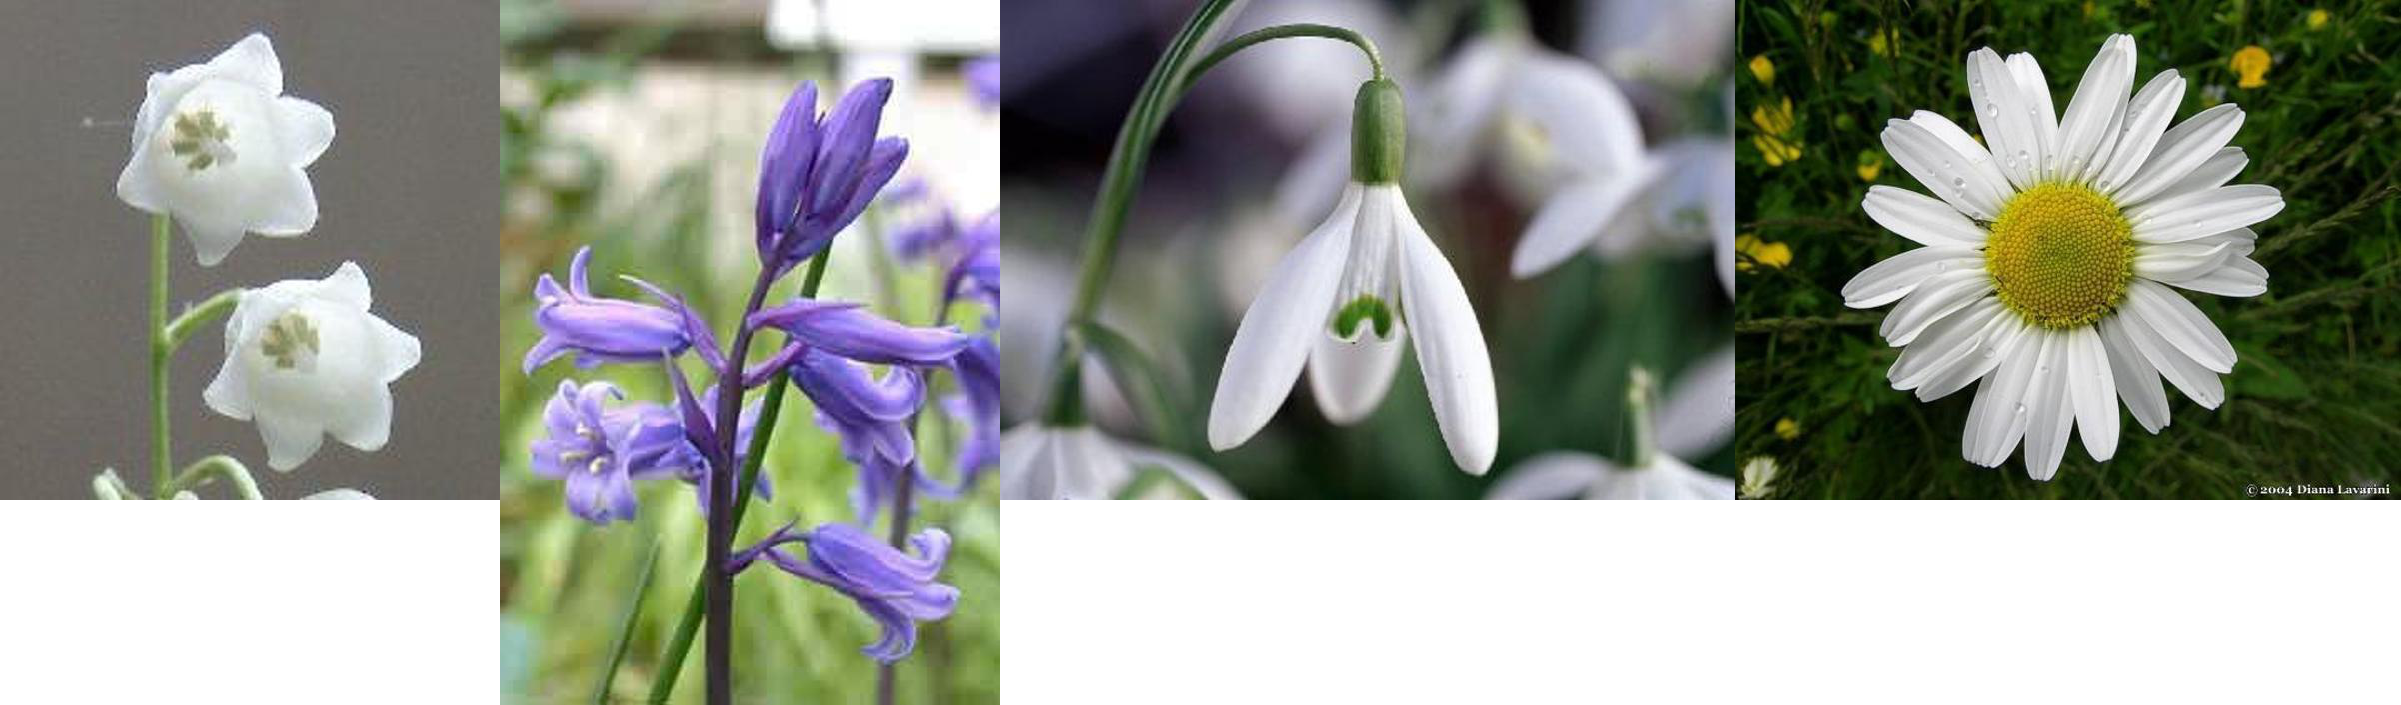

In [3]:
display_image_data(config.DATASET_PATH)

#### Initializing Preprocessors

In [2]:
config.IMAGE_PREPROCESSING_HEIGHT,config.IMAGE_PREPROCESSING_WIDTH

(64, 64)

In [3]:
uniform_aspect_preproc=UniformAspectPreprocessor(config.IMAGE_PREPROCESSING_HEIGHT, 
                                                 config.IMAGE_PREPROCESSING_WIDTH)
image_to_array_preproc=ImageToArrayPreprocessor()
preprocessors=[uniform_aspect_preproc, image_to_array_preproc]

#### Loading Image Data

In [4]:
data_loader=ImageDatumLoader(preprocessors=preprocessors)
data, labels= data_loader.load(dataset_path=config.DATASET_PATH,
                              class_index=config.CLASS_INDEX,
                              input_cast=ImageCast.RGB_64x64)


Loading Images :100% |❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆| 1360 of 1360 Time: 0:00:05
INFO:root:PROCESSED 1360/1360 IMAGES.
INFO:root:MEMORY SIZE OCCUPIED: 65.28 MB


In [5]:
classes=data_loader.classes

#### Splitting Train Test Sets

In [6]:
train_x, test_x, train_y, test_y= train_test_split(data, labels, test_size=config.TEST_SIZE, random_state=42)

In [7]:
label_binarizer=LabelBinarizer()
train_y=label_binarizer.fit_transform(train_y)
test_y=label_binarizer.transform(test_y)

#### Initializing Image Augmenter

In [8]:
augmenter=ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

#### Composing Network

In [9]:
refiner=SGD(learning_rate=config.ALPHA)
net=TinyVGGNet.compose(height=TinyVGGNetImage.HEIGHT, 
                         width=TinyVGGNetImage.WIDTH,
                         depth=TinyVGGNetImage.DEPTH, 
                         classes=len(classes))
net.compile(loss="categorical_crossentropy", optimizer=refiner, metrics=["accuracy"])

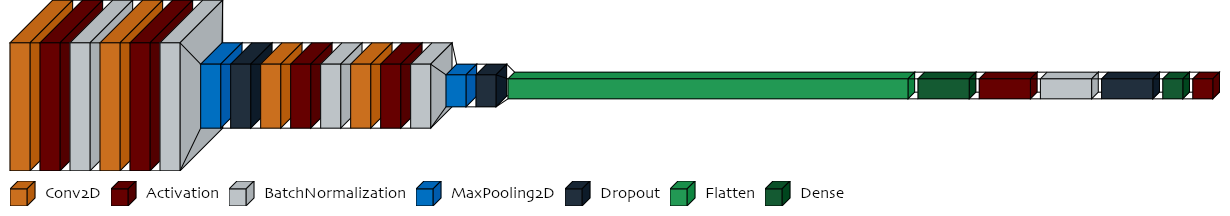

In [10]:
visualize_network(net)

#### Training Network

In [11]:
Z=net.fit(augmenter.flow(train_x, train_y, batch_size=config.BATCH_SIZE), validation_data=(test_x, test_y),
                     steps_per_epoch=len(train_x)//config.BATCH_SIZE, epochs=config.EPOCHS, verbose=1)


Epoch 1/100
15/15 [==============================] - 3s 160ms/step - loss: 3.8052 - accuracy: 0.1219 - val_loss: 2.8331 - val_accuracy: 0.0912
Epoch 2/100
15/15 [==============================] - 2s 137ms/step - loss: 2.6940 - accuracy: 0.2708 - val_loss: 3.0199 - val_accuracy: 0.0824
Epoch 3/100
15/15 [==============================] - 2s 141ms/step - loss: 2.3786 - accuracy: 0.3006 - val_loss: 3.1960 - val_accuracy: 0.0853
Epoch 4/100
15/15 [==============================] - 2s 138ms/step - loss: 2.0820 - accuracy: 0.3958 - val_loss: 3.3537 - val_accuracy: 0.1118
Epoch 5/100
15/15 [==============================] - 2s 137ms/step - loss: 2.0095 - accuracy: 0.4032 - val_loss: 3.4977 - val_accuracy: 0.0735
Epoch 6/100
15/15 [==============================] - 2s 136ms/step - loss: 1.9048 - accuracy: 0.4284 - val_loss: 3.5764 - val_accuracy: 0.0676
Epoch 7/100
15/15 [==============================] - 2s 136ms/step - loss: 1.8873 - accuracy: 0.4338 - val_loss: 3.6688 - val_accuracy: 0.0588

Epoch 58/100
15/15 [==============================] - 2s 135ms/step - loss: 0.7589 - accuracy: 0.7346 - val_loss: 1.3941 - val_accuracy: 0.6382
Epoch 59/100
15/15 [==============================] - 2s 134ms/step - loss: 0.7820 - accuracy: 0.7353 - val_loss: 1.6379 - val_accuracy: 0.5794
Epoch 60/100
15/15 [==============================] - 2s 134ms/step - loss: 0.8502 - accuracy: 0.6937 - val_loss: 1.2935 - val_accuracy: 0.6559
Epoch 61/100
15/15 [==============================] - 2s 134ms/step - loss: 0.7830 - accuracy: 0.7412 - val_loss: 1.3811 - val_accuracy: 0.6441
Epoch 62/100
15/15 [==============================] - 2s 134ms/step - loss: 0.8258 - accuracy: 0.6980 - val_loss: 1.5782 - val_accuracy: 0.6000
Epoch 63/100
15/15 [==============================] - 2s 141ms/step - loss: 0.7687 - accuracy: 0.7314 - val_loss: 1.4918 - val_accuracy: 0.6324
Epoch 64/100
15/15 [==============================] - 2s 150ms/step - loss: 0.8482 - accuracy: 0.7134 - val_loss: 1.5208 - val_accuracy:

#### Running Predictions On Testing Set

In [14]:
predictions=net.predict(test_x, batch_size=config.BATCH_SIZE)
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

           0       0.32      0.47      0.38        15
           1       0.54      0.95      0.69        20
          10       0.84      0.78      0.81        27
          11       0.75      0.60      0.67        20
          12       0.56      0.88      0.68        16
          13       0.80      0.44      0.57        18
          14       0.89      0.70      0.78        23
          15       0.87      0.65      0.74        20
          16       1.00      0.53      0.69        19
           2       0.89      0.44      0.59        18
           3       1.00      0.77      0.87        22
           4       0.51      0.90      0.65        20
           5       0.94      0.70      0.80        23
           6       0.82      0.86      0.84        21
           7       0.47      0.61      0.53        23
           8       0.81      0.81      0.81        16
           9       0.89      0.84      0.86        19

    accuracy              

#### Visualizing Network Performance

In [15]:
plot_training_metrics(Z,epochs=config.EPOCHS,inline=True)

In [16]:
mesh, class_name,class_index=confusion_mesh(test_y.argmax(axis=1), 
                                            predictions.argmax(axis=1),
                                           encoded_classes=LabelEncoder().fit_transform(classes),
                                           class_name="16",
                                           classes=classes.tolist())

In [17]:
plot_confusion_mesh(mesh, class_name)

#### Running Random Prediction

In [102]:
test_image, class_name=random_image(config.DATASET_PATH,class_index=config.CLASS_INDEX)

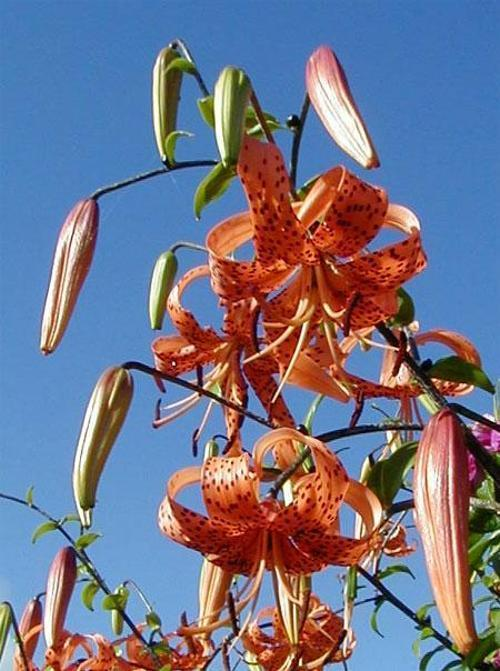

In [103]:
display_image(image=test_image)

In [110]:
class_name

'6'

In [105]:
preprocessed_test_image=preprocess_image(preprocessors=preprocessors,image=test_image, for_prediction=True)

In [106]:
test_predict=net.predict(preprocessed_test_image)

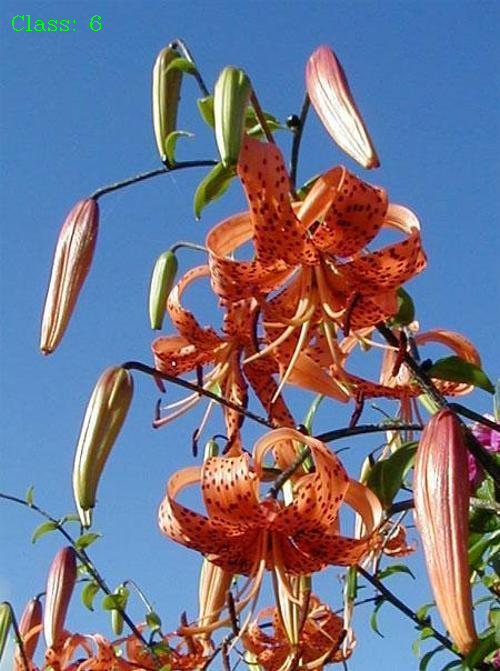

In [108]:
display_prediction(test_predict.argmax(axis=1),classes, image=test_image,font_scale=0.7 ,text_thickness=1)